In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 9 ##

## Histogram Review ##

In [2]:
#sleep = On average, how many hours of sleep do you get each night?
#tv = During a typical week, how many hours do you spend watching television?
#number = Pick a number between 0 and 9.
#study = During a typical week, how many hours do you spend studying?
#snow_white = Which of the Seven Dwarfs from Snow White are you most like?
survey = Table.read_table('survey09.csv')
survey.show(5)

sleep,tv,number,studying,snow_white
7.5,3,8,20,Sleepy
7,2,3,15,Doc
6,2,2,25,Sleepy
7,0,4,3,Grumpy
7,4,8,35,Bashful


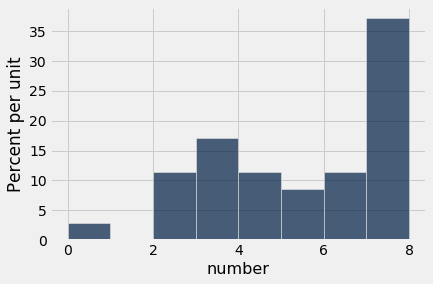

In [3]:
survey.hist('number', bins=np.arange(0, 9))

In [4]:
study = survey.column("studying")

In [5]:
[min(study), max(study)]

[0, 80]

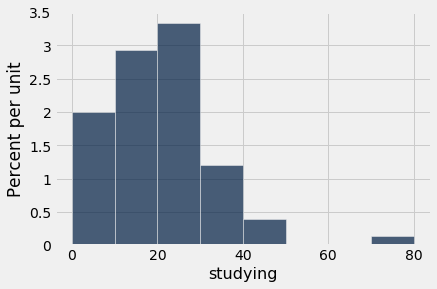

In [6]:
survey.hist('studying', bins=np.arange(0, 81, 10))


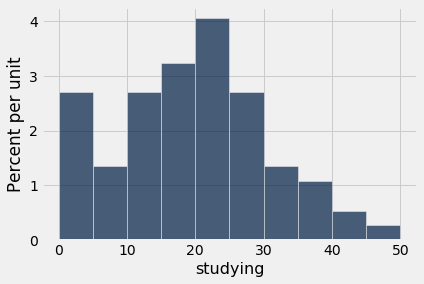

In [7]:
survey.hist('studying', bins=np.arange(0, 51, 5))

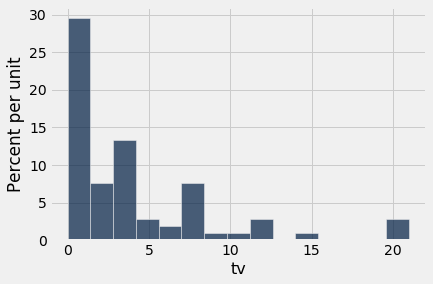

In [8]:
survey.hist('tv', bins=15)

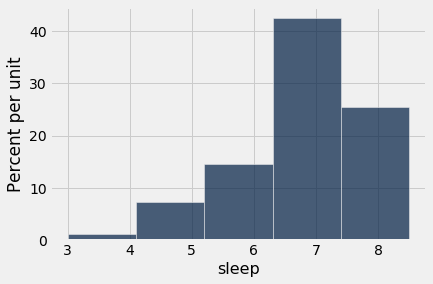

In [9]:
survey.hist('sleep', bins=5)

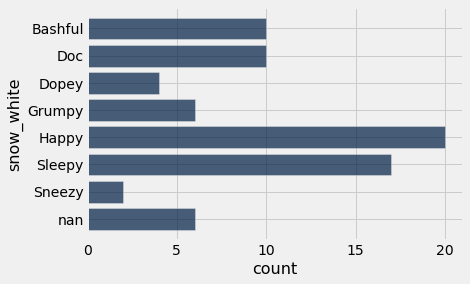

In [10]:
seven = survey.group('snow_white')
seven.barh('snow_white')

In [11]:
galton = Table.read_table('galton.csv')

In [12]:
#Each row corresponds to one adult child
#family = family indicator
#father height (inches) 
#mother height (inches) 
#"midparent height"= weighted average of parents' heights
#children= # of children in the family
#childNum = child's birth rank (1 = oldest)
#gender
#height (inches)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [13]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')

In [14]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


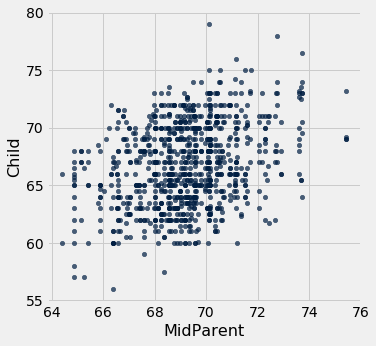

In [15]:
heights.scatter('MidParent', 'Child')

In [16]:
my_bins = np.arange(55, 80, 2)

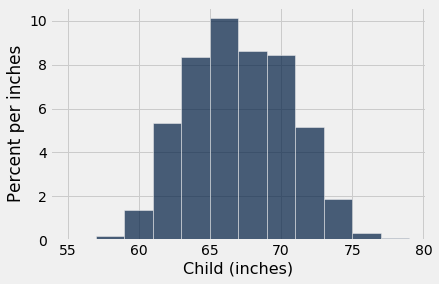

In [17]:
#Histogram of child heights
heights.hist('Child', bins = my_bins, unit='inches')

In [18]:
#Percentage of heights between 65 and 67
heights.where('Child', are.between(65, 67)).num_rows / heights.num_rows


0.20235546038543897

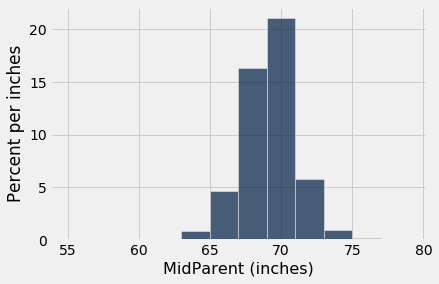

In [19]:
#Histogram of parent heights
heights.hist('MidParent', bins=my_bins, unit='inches')

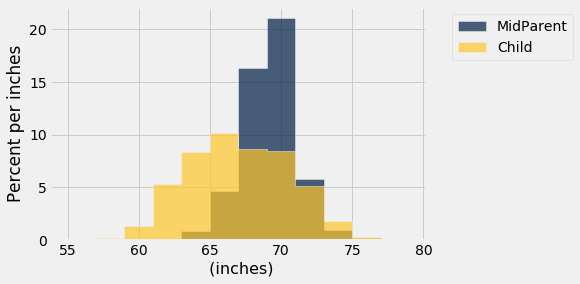

In [20]:
#Combined histogram
heights.hist(bins=my_bins, unit='inches')

In [1]:
# back to slides

## Functions ##

In [21]:
def double(x):
    return x * 2

In [22]:
double(7)

14

In [23]:
double(15/3)

10.0

In [24]:
my_number = 12

In [25]:
double(my_number)

24

In [26]:
double(my_number / 8)

3.0

In [27]:
double(make_array(3, 4, 5))

array([ 6,  8, 10])

In [28]:
double('data')

'datadata'

In [29]:
#"local scope"
x

NameError: name 'x' is not defined

In [30]:
x = 17

In [31]:
double(2)

4

In [32]:
x

17

In [33]:
double(x)

34

In [34]:
x

17

### Discussion Question

In [35]:
#What does this function do?
def percents(values):
    return np.round(100 * values / sum(values), 2)

In [36]:
percents(make_array(1, 2, 3, 4))

array([10., 20., 30., 40.])

In [37]:
percents(make_array(1, 4, 30))

array([ 2.86, 11.43, 85.71])

In [38]:
#Can have multiple inputs
def percents(values, places):
    return np.round(values / sum(values) * 100, places)

In [39]:
percents(make_array(1, 4, 30), 1)

array([ 2.9, 11.4, 85.7])

## Apply ##

In [40]:
ages = Table().with_columns(
    'Person', make_array('A', 'B', 'C', 'D'),
    'Age', make_array(63, 110, 99, 102)
)
ages

Person,Age
A,63
B,110
C,99
D,102


In [41]:
def cut_off_at_100(z):
    return min(z, 100)

In [42]:
cut_off_at_100(3)

3

In [43]:
cut_off_at_100(107)

100

In [44]:
cut_age_array = ages.apply(cut_off_at_100, 'Age')
cut_age_array

array([ 63, 100,  99, 100])

In [45]:
ages.with_column('Cut off ages', cut_age_array)

Person,Age,Cut off ages
A,63,63
B,110,100
C,99,99
D,102,100


In [46]:
type(cut_off_at_100)

function

## Prediction ##

In [47]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


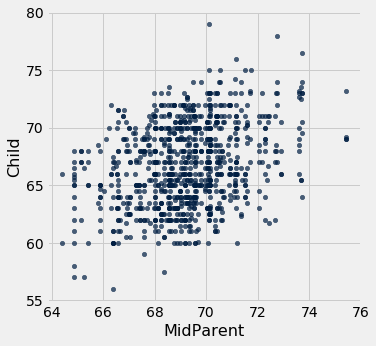

In [48]:
heights.scatter('MidParent', 'Child')

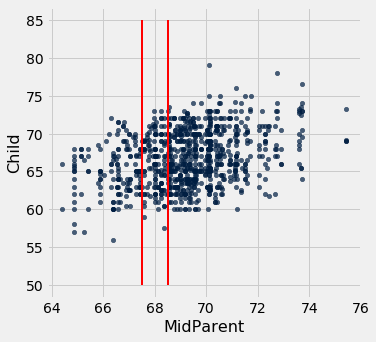

In [49]:
heights.scatter('MidParent', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [50]:
nearby = heights.where('MidParent', are.between(67.5, 68.5))
nearby.column('Child').mean()

66.24045801526718

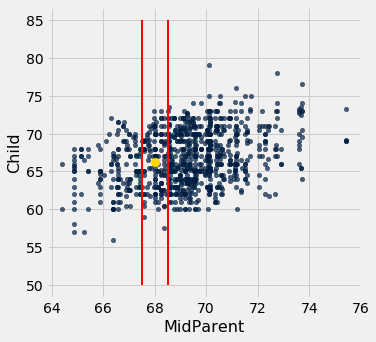

In [51]:
heights.scatter('MidParent', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 66.24, color='gold', s=75);

In [52]:
def predict_child(h):
    nearby = heights.where('MidParent', are.between(h-0.5, h+0.5))
    return nearby.column('Child').mean()

In [53]:
predict_child(68)

66.24045801526718

In [54]:
predict_child(65)

64.22962962962963

In [55]:
predictions = heights.apply(predict_child, 'MidParent')

In [56]:
heights = heights.with_column('Child Prediction', predictions)

In [57]:
heights

MidParent,Child,Child Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


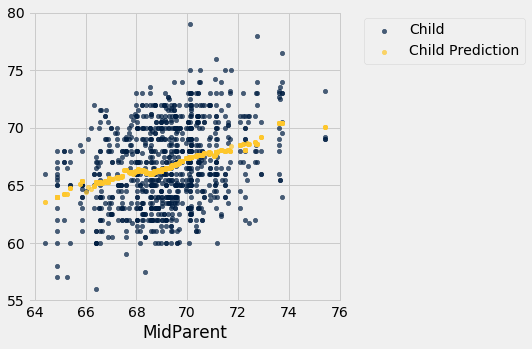

In [58]:
heights.scatter('MidParent')